In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

In [6]:
model = tf.keras.models.load_model('trained_model.keras')

C:\Users\Sagnik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [7]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      67,109,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,588,494 (521.04 MB)

 Trainable params: 68,294,246 (260.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,294,248 (260.52 MB)

## VISUALISATION OF SINGLE IMAGE OF TEST SET


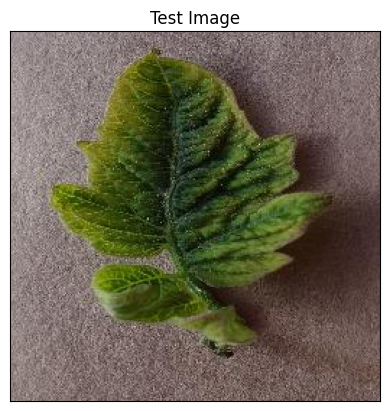

In [8]:
import cv2
image_path = 'test/test/TomatoYellowCurlVirus1.JPG'
#Reading image
img = cv2.imread(image_path)
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #CONVERSIUON FROM BGR TO RGB
#Displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## TESTING MODEL

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) ##Covert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [10]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


(array([[1.4421204e-17, 8.1365422e-18, 7.6408454e-15, 4.0258186e-20,
         6.3934968e-16, 1.6442288e-17, 1.5361682e-22, 3.5722642e-25,
         3.8077290e-29, 1.4293956e-27, 4.5280399e-36, 1.5961547e-12,
         5.6929836e-16, 1.0598844e-13, 1.0896009e-15, 1.6757463e-14,
         2.1833926e-15, 2.4086046e-22, 1.9954265e-13, 8.2648909e-19,
         3.6064831e-24, 2.8003071e-09, 3.4723408e-19, 7.5614905e-13,
         1.6984205e-20, 2.5988213e-17, 4.1590310e-14, 5.7674438e-20,
         3.3308373e-12, 1.0282475e-09, 2.1237933e-12, 1.5922034e-14,
         5.1337854e-11, 4.8385307e-10, 1.5527056e-07, 9.9999988e-01,
         2.6523683e-10, 1.7724275e-14]], dtype=float32),
 (1, 38))

In [11]:
result_index = np.argmax(prediction)
result_index

35

In [8]:
class_name  = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']


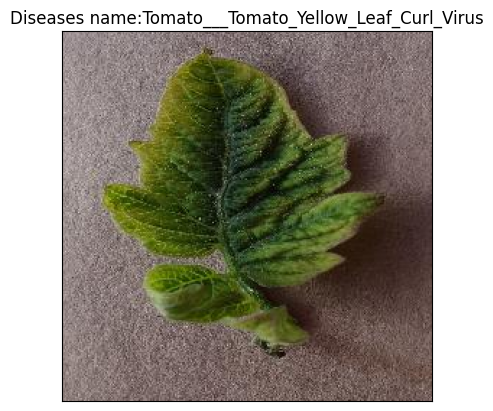

In [9]:
#Displaying Result of diseases prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Diseases name:{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [10]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'